In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
episode_file = open("../data/hit_approvals/task_3.json")
data = json.loads(episode_file.read())

print("Number of episodes {}".format(len(data["episodes"])))
for episode in data["episodes"]:
    print("Episode id: {}, Total actions: {}".format(episode["episode_id"], len(episode["reference_replay"])))

Number of episodes 1
Episode id: debugMMqDX:debuglCPD7, Total actions: 291


In [3]:
episode_data = []
columns = []
columns.append("episode_id")
columns.append("total_actions")

for episode in data["episodes"]:
    entry = {}
    entry["episode_id"] = episode["episode_id"]
    entry["total_actions"] = len(episode["reference_replay"])


    for replay_data in episode["reference_replay"]:
        action = replay_data["action"]
        if not action in entry:
            entry[action] = 0
        entry[action] += 1

        if action not in columns:
            columns.append(action)
    episode_data.append(entry)

In [4]:
df = pd.DataFrame(episode_data, columns=columns)
df.fillna(0, inplace=True)
df.head(15)

,episode_id,total_actions,stepPhysics,turnRight,lookDown,moveBackward,moveForward,turnLeft,grabReleaseObject
0,debugMMqDX:debuglCPD7,291,227,11,7,15,22,7,2


In [5]:
df["agent_actions"] = df["total_actions"] - df["stepPhysics"]

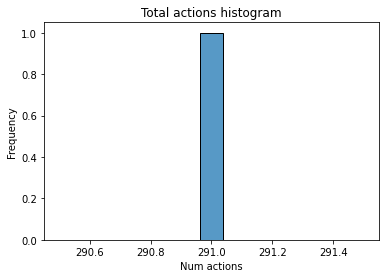

In [6]:
sns.histplot(df["total_actions"].values, bins=13)
plt.gca().set(title='Total actions histogram', ylabel='Frequency', xlabel='Num actions')
plt.savefig("action_distribution.jpg")

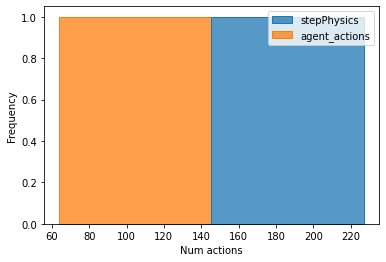

In [7]:
sns.histplot(data=df[["stepPhysics", "agent_actions"]], element="step")
plt.gca().set(ylabel='Frequency', xlabel='Num actions')
plt.savefig("env_and_agent_action_distribution.jpg")

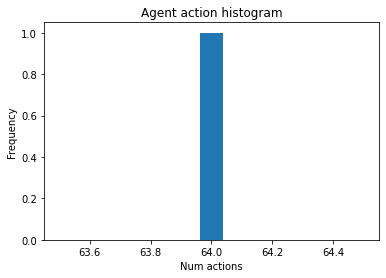

In [8]:
plt.hist(df["agent_actions"].values, bins=13)
plt.gca().set(title='Agent action histogram', ylabel='Frequency', xlabel='Num actions')
plt.savefig("agent_action_dist.jpg")

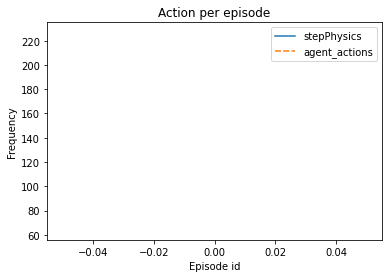

In [9]:
sns.lineplot(data=df[["stepPhysics", "agent_actions"]])
plt.gca().set(title='Action per episode', ylabel='Frequency', xlabel='Episode id')
plt.savefig("action_per_episode.jpg")

In [10]:
sns.lineplot(data=df[["turnLeft", "turnRight", "lookDown", "lookUp", "moveForward", "moveBackward", "grabReleaseObject"]])
plt.gca().set(title='Agent action per episode', ylabel='Frequency', xlabel='Episode id')
plt.savefig("agent_action_per_episode.jpg")

KeyError: "['lookUp'] not in index"

In [32]:
episode = data["episodes"][0]["reference_replay"]

In [48]:
import datetime
fmt = "%Y-%m-%d %H:%M:%S.%f"

def get_dt(epochtime):
    return datetime.datetime.fromtimestamp(float(epochtime)/1000.0)

def get_diff(dt1, dt2):
    diff = dt2 - dt1
    elapsed_time = int((diff.seconds * 1000) + (diff.microseconds / 1000))
    return diff

In [49]:
dtt = get_dt(episode[0]["timestamp"])

In [51]:
episode_actions = [(rep["action"], float(rep["timestamp"])-float(episode[0]["timestamp"])) for rep in episode]
episode_actions

[('stepPhysics', 0.0),
 ('stepPhysics', 98.0),
 ('stepPhysics', 198.0),
 ('stepPhysics', 299.0),
 ('stepPhysics', 402.0),
 ('stepPhysics', 504.0),
 ('stepPhysics', 600.0),
 ('turnRight', 671.0),
 ('stepPhysics', 699.0),
 ('stepPhysics', 804.0),
 ('lookDown', 872.0),
 ('stepPhysics', 901.0),
 ('stepPhysics', 999.0),
 ('stepPhysics', 1104.0),
 ('lookDown', 1136.0),
 ('stepPhysics', 1202.0),
 ('stepPhysics', 1298.0),
 ('stepPhysics', 1398.0),
 ('stepPhysics', 1501.0),
 ('stepPhysics', 1603.0),
 ('lookDown', 1637.0),
 ('stepPhysics', 1703.0),
 ('lookDown', 1721.0),
 ('stepPhysics', 1798.0),
 ('moveBackward', 1879.0),
 ('stepPhysics', 1898.0),
 ('stepPhysics', 2002.0),
 ('stepPhysics', 2102.0),
 ('stepPhysics', 2199.0),
 ('stepPhysics', 2298.0),
 ('moveBackward', 2383.0),
 ('stepPhysics', 2394.0),
 ('moveBackward', 2464.0),
 ('stepPhysics', 2496.0),
 ('moveBackward', 2548.0),
 ('stepPhysics', 2596.0),
 ('moveBackward', 2632.0),
 ('stepPhysics', 2698.0),
 ('moveBackward', 2716.0),
 ('stepPhy

In [52]:
with open("actions.txt", "w") as f:
    f.write("\n".join([ep_ac[0] + "," + str(ep_ac[1]) for ep_ac in episode_actions]))